## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Stakeholder: Real Estate Investment Firm interested in buying houses, improving them, and selling them.
Target: price

# EDA

## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import statsmodels.api as sm

## Functions

In [2]:
def drop_outliers(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1

    lower_lim = q1 - 1.5 * iqr
    upper_lim = q3 + 1.5 * iqr

    df = df.loc[ (df[col] >= lower_lim) & (df[col] <= upper_lim) ].reset_index(drop=True)
    return df

In [3]:
def scale_numberical_cols(df, cols_to_scale):
    df = df.copy()
    features = cols_to_scale
    autoscaler = StandardScaler()
    df[features] = autoscaler.fit_transform(df[features])
    return df


## EDA

In [4]:
df = pd.read_csv('data/kc_house_data.csv')
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


### Drop Outliers (+- 1.5x Interquartile Range)

In [6]:
df = drop_outliers(df, 'sqft_living').reset_index(drop=True)
df = drop_outliers(df, 'lat').reset_index(drop=True)
df = drop_outliers(df, 'long').reset_index(drop=True)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,2.794600e+04,2.794600e+04,27946.000000,27946.000000,27946.000000,2.794600e+04,27946.000000,27946.000000,27946.000000,27946.000000,27946.000000,27946.000000,27946.000000,27946.000000,27946.000000
mean,4.554369e+09,1.047369e+06,3.402204,2.274959,2043.667788,1.589929e+04,1.503686,1752.613039,467.416267,324.126959,205.662528,1973.005833,92.165927,47.542780,-122.224756
std,2.873558e+09,6.979314e+05,0.955725,0.817717,814.027739,5.722981e+04,0.547971,761.241259,554.282471,274.026921,230.998720,31.546365,419.156533,0.148075,0.128275
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.000860,-122.526650
25%,2.126049e+09,6.380000e+05,3.000000,2.000000,1420.000000,5.000000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.420355,-122.331310
50%,3.878901e+09,8.500000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1550.000000,0.000000,400.000000,140.000000,1975.000000,0.000000,47.558932,-122.246358
75%,7.278700e+09,1.275000e+06,4.000000,2.500000,2560.000000,1.040000e+04,2.000000,2207.000000,950.000000,500.000000,300.000000,2000.000000,0.000000,47.673245,-122.138497
max,9.904000e+09,3.075000e+07,11.000000,7.500000,4410.000000,3.253932e+06,4.000000,5500.000000,4000.000000,2840.000000,4370.000000,2022.000000,2022.000000,48.054940,-121.829060


### Finding & Dropping Nulls

In [7]:
df.isnull().sum().sum()

31

In [8]:
df = df.dropna().reset_index(drop=True)

In [9]:
df.isnull().sum().sum()

0

### Dropping Undesired Columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27915 entries, 0 to 27914
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             27915 non-null  int64  
 1   date           27915 non-null  object 
 2   price          27915 non-null  float64
 3   bedrooms       27915 non-null  int64  
 4   bathrooms      27915 non-null  float64
 5   sqft_living    27915 non-null  int64  
 6   sqft_lot       27915 non-null  int64  
 7   floors         27915 non-null  float64
 8   waterfront     27915 non-null  object 
 9   greenbelt      27915 non-null  object 
 10  nuisance       27915 non-null  object 
 11  view           27915 non-null  object 
 12  condition      27915 non-null  object 
 13  grade          27915 non-null  object 
 14  heat_source    27915 non-null  object 
 15  sewer_system   27915 non-null  object 
 16  sqft_above     27915 non-null  int64  
 17  sqft_basement  27915 non-null  int64  
 18  sqft_g

In [11]:
df = df.drop(['view', 
              'sqft_above',
              'sqft_basement', 
              'yr_renovated', 
              'id'
             ], axis=1)

### Extract zide codes from address to use as possible feature

In [12]:
df['zipcode'] = df.address.str[-20:-15]
df['zipcode'].value_counts()

98042    985
98038    855
98103    761
98115    752
98117    748
        ... 
98050      2
98270      1
98422      1
98296      1
98387      1
Name: zipcode, Length: 80, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27915 entries, 0 to 27914
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          27915 non-null  object 
 1   price         27915 non-null  float64
 2   bedrooms      27915 non-null  int64  
 3   bathrooms     27915 non-null  float64
 4   sqft_living   27915 non-null  int64  
 5   sqft_lot      27915 non-null  int64  
 6   floors        27915 non-null  float64
 7   waterfront    27915 non-null  object 
 8   greenbelt     27915 non-null  object 
 9   nuisance      27915 non-null  object 
 10  condition     27915 non-null  object 
 11  grade         27915 non-null  object 
 12  heat_source   27915 non-null  object 
 13  sewer_system  27915 non-null  object 
 14  sqft_garage   27915 non-null  int64  
 15  sqft_patio    27915 non-null  int64  
 16  yr_built      27915 non-null  int64  
 17  address       27915 non-null  object 
 18  lat           27915 non-nu

### Add feature for age when sold

In [14]:
df['date'].value_counts()
df['date_year'] = df['date'].apply(pd.to_datetime)
df['date_year'] = df['date_year'].dt.year
df['date_year']

df['age_when_sold'] = df['date_year'] - df['yr_built']
df['age_when_sold']

0         53
1         71
2         65
3         11
4          9
        ... 
27910    100
27911     10
27912     27
27913     16
27914     57
Name: age_when_sold, Length: 27915, dtype: int64

In [15]:
df['yr_built'].value_counts()

2021    1241
1968     504
1978     470
1967     468
1977     467
        ... 
1901      39
1935      37
1934      36
1902      35
1933      30
Name: yr_built, Length: 123, dtype: int64

In [16]:
# df[['date', 'yr_built']] = df[['date', 'yr_built']].apply(pd.to_datetime)
# df['age_when_sold'] = ((df['date'] - df['yr_built']).dt.days)/365
# df['age_when_sold'].value_counts()
# # df['yr_built'].value_counts()

In [17]:
# df['year_sold'] = df['date'].dt.year
# df['year_sold'].value_counts()
# len(df)

In [18]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,lat,long,date_year,age_when_sold
count,2.791500e+04,27915.000000,27915.000000,27915.000000,2.791500e+04,27915.000000,27915.000000,27915.000000,27915.000000,27915.000000,27915.000000,27915.000000,27915.000000
mean,1.047529e+06,3.403439,2.275497,2044.260684,1.581814e+04,1.503708,324.320867,205.671503,1972.999928,47.542832,-122.224779,2021.362601,48.362672
std,6.978761e+05,0.954216,0.816742,813.412998,5.669929e+04,0.548039,273.996177,230.946381,31.534987,0.148043,0.128199,0.480760,31.549248
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,1900.000000,47.000860,-122.526650,2021.000000,-1.000000
25%,6.380000e+05,3.000000,2.000000,1420.000000,5.000000e+03,1.000000,0.000000,40.000000,1952.000000,47.420365,-122.331310,2021.000000,22.000000
50%,8.500000e+05,3.000000,2.500000,1920.000000,7.475000e+03,1.500000,400.000000,140.000000,1975.000000,47.558990,-122.246390,2021.000000,46.000000
75%,1.275000e+06,4.000000,2.500000,2560.000000,1.040000e+04,2.000000,500.000000,300.000000,2000.000000,47.673257,-122.138505,2022.000000,70.000000
max,3.075000e+07,11.000000,7.500000,4410.000000,3.253932e+06,4.000000,2840.000000,4370.000000,2022.000000,48.054940,-121.829060,2022.000000,122.000000


Find the most correlated column to price

In [19]:
df.corr()['price'].sort_values()

age_when_sold   -0.072835
yr_built         0.074317
sqft_lot         0.074321
date_year        0.095074
long             0.111651
floors           0.186293
sqft_garage      0.202625
sqft_patio       0.249999
bedrooms         0.257731
lat              0.346104
bathrooms        0.402165
sqft_living      0.529153
price            1.000000
Name: price, dtype: float64

### EDA Visualizations

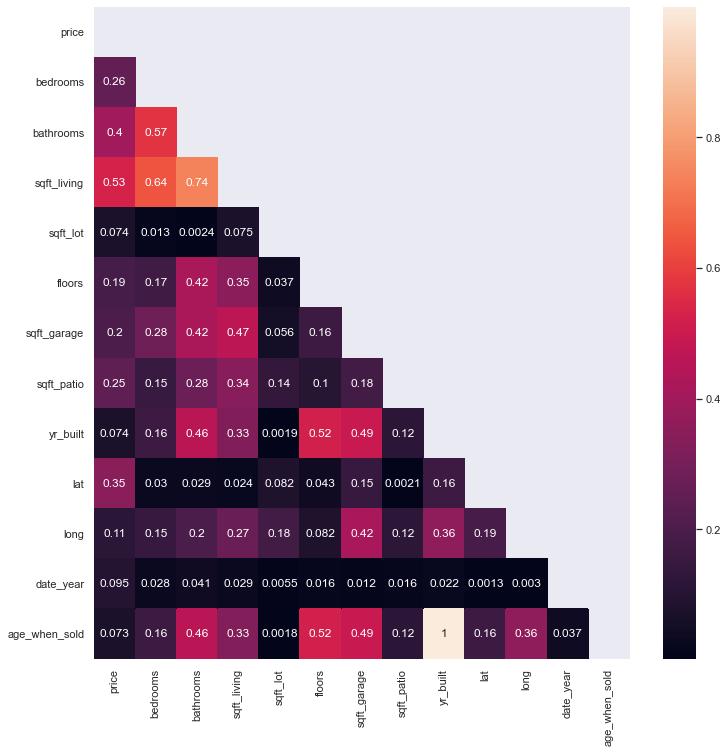

In [20]:
sns.set(rc={'figure.figsize':(12, 12)})

# Use the .heatmap function to depict the relationships visually!
mask  = np.triu(np.ones_like(df.corr()))
sns.heatmap(abs(df.corr()), annot=True, mask=mask);

In [21]:
#pairplot with continuous variables
#commented out for run-time

#sns.pairplot(df[['price', 'sqft_living', 'sqft_lot', 'sqft_patio']])

In [22]:
#pairplot with wanted columns
#commented out for run-time

#sns.pairplot(df_colwanted)

Log Scale Target

<AxesSubplot:xlabel='price', ylabel='Count'>

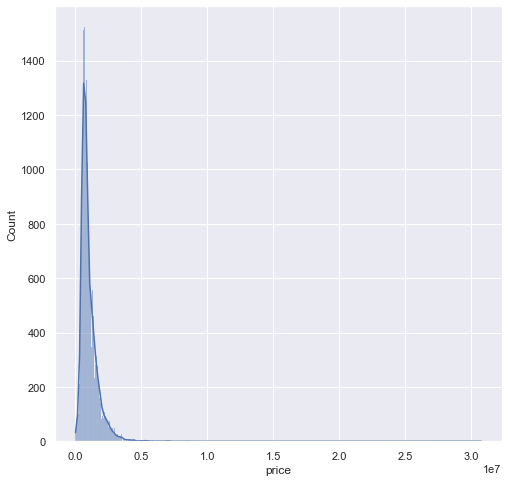

In [23]:
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(df.price, kde=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

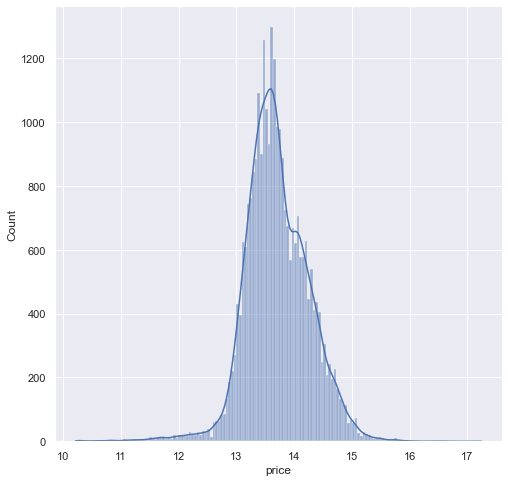

In [24]:
#logscaling target
fig, ax = plt.subplots(figsize=(8,8))
y2 = np.log(df.price)
sns.histplot(y2, kde=True)

### EDA - Baseline OLS Model

In [25]:
x = sm.add_constant(df[['sqft_living', 'sqft_lot', 'sqft_patio']])
y = df['price']
model = sm.OLS(y, x).fit()
model.rsquared

0.28590049813451934

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     3725.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:22:06   Log-Likelihood:            -4.1053e+05
No. Observations:               27915   AIC:                         8.211e+05
Df Residuals:                   27911   BIC:                         8.211e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.165e+05   9553.485     12.194      0.000    9.78e+04    1.35e+05
sqft_living   430.5670      4.625     93.102      0.000     421.502     439.632
sqft_lot        0.3278      0.063      5.213      0.000       0.205       0.451
sqft_patio    221.9957     16.398     13.538      0.000     189.855     254.136
==============================================================================
Omnibus:                    41290.071   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         90337533.198
Skew:                           8.374   Prob(JB):                         0.00
Kurtosis:                     281.186   Cond. No.                     1.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### EDA - Log Scaled OLS Model

In [27]:
x = sm.add_constant(df[['sqft_living', 'sqft_lot', 'sqft_patio']])
y2 = np.log(df['price'])
model = sm.OLS(y2, x).fit()
model.rsquared

0.3269432340692089

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     4519.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:22:06   Log-Likelihood:                -17521.
No. Observations:               27915   AIC:                         3.505e+04
Df Residuals:                   27911   BIC:                         3.508e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9170      0.007   1759.129      0.000      12.903      12.931
sqft_living     0.0004   3.55e-06    103.785      0.000       0.000       0.000
sqft_lot     1.165e-07   4.83e-08      2.411      0.016    2.18e-08    2.11e-07
sqft_patio      0.0002   1.26e-05     13.112      0.000       0.000       0.000
==============================================================================
Omnibus:                     5296.329   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38601.583
Skew:                          -0.722   Prob(JB):                         0.00
Kurtosis:                       8.577   Cond. No.                     1.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### EDA - Log Scaled OLS

Dropping columns to address multicolinearity

In [29]:
x = sm.add_constant(df[['sqft_living', 'age_when_sold']])
y2 = np.log(df['price'])
model = sm.OLS(y2, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     6917.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:22:06   Log-Likelihood:                -17429.
No. Observations:               27915   AIC:                         3.486e+04
Df Residuals:                   27912   BIC:                         3.489e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.7879      0.010   1284.056      0.000      12.768      12.807
sqft_living       0.0004   3.52e-06    115.915      0.000       0.000       0.000
age_when_sold     0.0018   9.08e-05     19.342      0.000       0.002       0.002
==============================================================================
Omnibus:                     5652.758   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42834.006
Skew:                          -0.772   Prob(JB):                         0.00
Kurtosis:                       8.869   Cond. No.                     8.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     6917.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:22:06   Log-Likelihood:                -17429.
No. Observations:               27915   AIC:                         3.486e+04
Df Residuals:                   27912   BIC:                         3.489e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.7879      0.010   1284.056      0.000      12.768      12.807
sqft_living       0.0004   3.52e-06    115.915      0.000       0.000       0.000
age_when_sold     0.0018   9.08e-05     19.342      0.000       0.002       0.002
==============================================================================
Omnibus:                     5652.758   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42834.006
Skew:                          -0.772   Prob(JB):                         0.00
Kurtosis:                       8.869   Cond. No.                     8.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### EDA - OneHotEncoding

In [31]:
#0:number of baths
#1:number of bedrooms
#2:condition
#3:heat source

ohe = OneHotEncoder(drop='first')
ohe_cols = ['bathrooms', 
            'bedrooms', 
            'condition', 
            'heat_source']
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                        columns=ohe.get_feature_names())
ohe_all
X_cat = pd.concat([x,ohe_all], axis=1)
X_cat.head(2)

,const,sqft_living,age_when_sold,x0_0.5,x0_1.0,x0_1.5,x0_2.0,x0_2.5,x0_3.0,x0_3.5,...,x2_Fair,x2_Good,x2_Poor,x2_Very Good,x3_Electricity/Solar,x3_Gas,x3_Gas/Solar,x3_Oil,x3_Oil/Solar,x3_Other
0,1.0,1180,53,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,2770,71,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [32]:
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     404.2
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:22:08   Log-Likelihood:                -16921.
No. Observations:               27915   AIC:                         3.392e+04
Df Residuals:                   27876   BIC:                         3.424e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.8677      0.096    133.935      0.000      12.679      13.056
sqft_living              0.0004   5.56e-06     69.143      0.000       0.000       0.000
age_when_sold            0.0026      0.000     23.175      0.000       0.002       0.003
x0_0.5                   0.7740      0.236      3.281      0.001       0.312       1.236
x0_1.0                   0.5278      0.127      4.148      0.000       0.278       0.777
x0_1.5                   0.5884      0.128      4.612      0.000       0.338       0.838
x0_2.0                   0.6645      0.127      5.221      0.000       0.415       0.914
x0_2.5                   0.7168      0.127      5.634      0.000       0.467       0.966
x0_3.0                   0.7447      0.127      5.846      0.000       0.495       0.994
x0_3.5                   0.8673      0.128      6.796      0.000       0.617       1.117
x0_4.0                   0.8586      0.129      6.675      0.000       0.606       1.111
x0_4.5                   0.9984      0.130      7.683      0.000       0.744       1.253
x0_5.0                   0.8925      0.140      6.390      0.000       0.619       1.166
x0_5.5                   0.6654      0.158      4.218      0.000       0.356       0.975
x0_6.0                   0.8961      0.177      5.072      0.000       0.550       1.242
x0_6.5                   1.0381      0.287      3.618      0.000       0.476       1.601
x0_7.0                   0.8265      0.287      2.877      0.004       0.263       1.390
x0_7.5                   0.7106      0.348      2.040      0.041       0.028       1.394
x1_1                    -0.5450      0.101     -5.409      0.000      -0.742      -0.348
x1_2                    -0.6743      0.098     -6.857      0.000      -0.867      -0.482
x1_3                    -0.7772      0.098     -7.904      0.000      -0.970      -0.584
x1_4                    -0.8398      0.099     -8.521      0.000      -1.033      -0.647
x1_5                    -0.9179      0.099     -9.269      0.000      -1.112      -0.724
x1_6                    -1.0087      0.101     -9.971      0.000      -1.207      -0.810
x1_7                    -1.1242      0.114     -9.883      0.000      -1.347      -0.901
x1_8                    -1.0825      0.126     -8.565      0.000      -1.330      -0.835
x1_9                    -1.1615      0.170     -6.839      0.000      -1.494      -0.829
x1_10                   -1.2501      0.523     -2.391      0.017      -2.275      -0.225
x1_11                   -0.7916      0.455     -1.739      0.082      -1.684       0.100
x2_Fair                 -0.1080      0.031     -3.537      0.000      -0.168      -0.048
x2_Good                  0.0015      0.006      0.227      0.820      -0.011       0.014
x2_Poor                 -0.2982      0.058     -5.165    

### Scale the numerical columns

In [33]:
df = scale_numberical_cols(df, ['sqft_living', 'age_when_sold', 'long', 'lat'])
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_garage,sqft_patio,yr_built,address,lat,long,zipcode,date_year,age_when_sold
0,5/24/2022,675000.0,4,1.0,-1.062531,7140,1.0,NO,NO,NO,...,PUBLIC,0,40,1969,"2102 Southeast 21st Court, Renton, Washington ...",-0.546179,0.267240,98055,2022,0.146990
1,12/13/2021,920000.0,5,2.5,0.892231,6703,1.0,NO,NO,YES,...,PUBLIC,0,240,1950,"11231 Greenwood Avenue North, Seattle, Washing...",1.139510,-1.022891,98133,2021,0.717536
2,9/29/2021,311000.0,6,2.0,1.027466,6156,1.0,NO,NO,NO,...,PUBLIC,0,0,1956,"8504 South 113th Street, Seattle, Washington 9...",-0.275510,-0.003283,98178,2021,0.527354
3,12/14/2021,775000.0,3,3.0,0.142291,1400,2.0,NO,NO,NO,...,PUBLIC,200,270,2010,"4079 Letitia Avenue South, Seattle, Washington...",0.157244,-0.510318,98118,2021,-1.184286
4,8/24/2021,592500.0,2,2.0,-1.136295,758,2.0,NO,NO,YES,...,PUBLIC,550,30,2012,"2193 Northwest Talus Drive, Issaquah, Washingt...",-0.069991,1.192697,98027,2021,-1.247680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27910,11/30/2021,1555000.0,5,2.0,-0.165061,4000,1.5,NO,NO,NO,...,PUBLIC,0,210,1921,"4673 Eastern Avenue North, Seattle, Washington...",0.823481,-0.816099,98103,2021,1.636751
27911,6/16/2021,1313000.0,3,2.0,-0.029826,5800,2.0,NO,NO,NO,...,PUBLIC,0,520,2011,"4131 44th Avenue Southwest, Seattle, Washingto...",0.153866,-1.277189,98116,2021,-1.215983
27912,5/27/2022,800000.0,3,2.0,-0.521590,3600,1.0,NO,NO,YES,...,PUBLIC,240,110,1995,"910 Martin Luther King Jr Way, Seattle, Washin...",0.456385,-0.554391,98122,2022,-0.677134
27913,2/24/2022,775000.0,3,2.5,0.646349,2889,2.0,NO,NO,NO,...,PUBLIC,480,100,2006,"17127 114th Avenue Southeast, Renton, Washingt...",-0.630514,0.278473,98055,2022,-1.025801


In [34]:
ohe_cols = ['bathrooms', 
            'bedrooms', 
            'condition', 
            'heat_source']

ohe = OneHotEncoder(drop='first')
    
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all], axis=1)
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     404.2
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:22:09   Log-Likelihood:                -16921.
No. Observations:               27915   AIC:                         3.392e+04
Df Residuals:                   27876   BIC:                         3.424e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.8677      0.096    133.935      0.000      12.679      13.056
sqft_living              0.0004   5.56e-06     69.143      0.000       0.000       0.000
age_when_sold            0.0026      0.000     23.175      0.000       0.002       0.003
x0_0.5                   0.7740      0.236      3.281      0.001       0.312       1.236
x0_1.0                   0.5278      0.127      4.148      0.000       0.278       0.777
x0_1.5                   0.5884      0.128      4.612      0.000       0.338       0.838
x0_2.0                   0.6645      0.127      5.221      0.000       0.415       0.914
x0_2.5                   0.7168      0.127      5.634      0.000       0.467       0.966
x0_3.0                   0.7447      0.127      5.846      0.000       0.495       0.994
x0_3.5                   0.8673      0.128      6.796      0.000       0.617       1.117
x0_4.0                   0.8586      0.129      6.675      0.000       0.606       1.111
x0_4.5                   0.9984      0.130      7.683      0.000       0.744       1.253
x0_5.0                   0.8925      0.140      6.390      0.000       0.619       1.166
x0_5.5                   0.6654      0.158      4.218      0.000       0.356       0.975
x0_6.0                   0.8961      0.177      5.072      0.000       0.550       1.242
x0_6.5                   1.0381      0.287      3.618      0.000       0.476       1.601
x0_7.0                   0.8265      0.287      2.877      0.004       0.263       1.390
x0_7.5                   0.7106      0.348      2.040      0.041       0.028       1.394
x1_1                    -0.5450      0.101     -5.409      0.000      -0.742      -0.348
x1_2                    -0.6743      0.098     -6.857      0.000      -0.867      -0.482
x1_3                    -0.7772      0.098     -7.904      0.000      -0.970      -0.584
x1_4                    -0.8398      0.099     -8.521      0.000      -1.033      -0.647
x1_5                    -0.9179      0.099     -9.269      0.000      -1.112      -0.724
x1_6                    -1.0087      0.101     -9.971      0.000      -1.207      -0.810
x1_7                    -1.1242      0.114     -9.883      0.000      -1.347      -0.901
x1_8                    -1.0825      0.126     -8.565      0.000      -1.330      -0.835
x1_9                    -1.1615      0.170     -6.839      0.000      -1.494      -0.829
x1_10                   -1.2501      0.523     -2.391      0.017      -2.275      -0.225
x1_11                   -0.7916      0.455     -1.739      0.082      -1.684       0.100
x2_Fair                 -0.1080      0.031     -3.537      0.000      -0.168      -0.048
x2_Good                  0.0015      0.006      0.227      0.820      -0.011       0.014
x2_Poor                 -0.2982      0.058     -5.165    

Scaling didn't change r squared (as expected)

### Testing adding additional categorical features with OHE

In [35]:
ohe_cols = ['bathrooms', 
            'bedrooms', 
            'condition', 
            'heat_source',
            'waterfront', 
            'floors', 
            'zipcode',
            'grade']

ohe = OneHotEncoder(drop='first')
    
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all], axis=1)
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     416.8
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:22:14   Log-Likelihood:                -7663.8
No. Observations:               27915   AIC:                         1.560e+04
Df Residuals:                   27780   BIC:                         1.671e+04
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   13.0235      0.073    177.874      0.000      12.880      13.167
sqft_living              0.0002   4.88e-06     44.604      0.000       0.000       0.000
age_when_sold            0.0008      0.000      7.158      0.000       0.001       0.001
x0_0.5                   0.7989      0.170      4.687      0.000       0.465       1.133
x0_1.0                   0.6476      0.092      7.041      0.000       0.467       0.828
x0_1.5                   0.6352      0.092      6.892      0.000       0.455       0.816
x0_2.0                   0.6732      0.092      7.325      0.000       0.493       0.853
x0_2.5                   0.6935      0.092      7.544      0.000       0.513       0.874
x0_3.0                   0.7058      0.092      7.670      0.000       0.525       0.886
x0_3.5                   0.7093      0.092      7.691      0.000       0.529       0.890
x0_4.0                   0.7137      0.093      7.681      0.000       0.532       0.896
x0_4.5                   0.7754      0.094      8.257      0.000       0.591       0.959
x0_5.0                   0.8198      0.101      8.133      0.000       0.622       1.017
x0_5.5                   0.5761      0.114      5.054      0.000       0.353       0.799
x0_6.0                   0.7798      0.127      6.123      0.000       0.530       1.029
x0_6.5                   0.8145      0.207      3.937      0.000       0.409       1.220
x0_7.0                   0.8523      0.207      4.118      0.000       0.447       1.258
x0_7.5                   0.8452      0.251      3.371      0.001       0.354       1.337
x1_1                    -0.5668      0.073     -7.779      0.000      -0.710      -0.424
x1_2                    -0.6900      0.071     -9.710      0.000      -0.829      -0.551
x1_3                    -0.6585      0.071     -9.263      0.000      -0.798      -0.519
x1_4                    -0.6538      0.071     -9.173      0.000      -0.794      -0.514
x1_5                    -0.6863      0.072     -9.580      0.000      -0.827      -0.546
x1_6                    -0.7021      0.073     -9.590      0.000      -0.846      -0.559
x1_7                    -0.7862      0.082     -9.556      0.000      -0.947      -0.625
x1_8                    -0.7038      0.091     -7.698      0.000      -0.883      -0.525
x1_9                    -0.7191      0.123     -5.864      0.000      -0.959      -0.479
x1_10                   -1.1918      0.377     -3.165      0.002      -1.930      -0.454
x1_11                   -0.7068      0.328     -2.156      0.031      -1.349      -0.064
x2_Fair                 -0.0916      0.022     -4.147      0.000      -0.135      -0.048
x2_Good                  0.0577      0.005     12.025      0.000       0.048       0.067
x2_Poor                 -0.1753      0.043     -4.094    

Notes:
- Durbin Watson score < 2 implies homoskedacity

### Ordinal Encoding Grade and Condition 

In [36]:
df.grade.value_counts()

7 Average        11373
8 Good            8658
9 Better          3362
6 Low Average     2796
10 Very Good      1074
5 Fair             377
11 Excellent       202
4 Low               44
12 Luxury           20
3 Poor               8
2 Substandard        1
Name: grade, dtype: int64

In [37]:
# ordinally encoding grade
grade_df = df[['grade']]
grade_cats = [['2 Substandard',
               '3 Poor',
               '4 Low',
               '5 Fair',
               '6 Low Average',
               '7 Average',
               '8 Good',
               '9 Better',
               '10 Very Good',
               '11 Excellent',
               '12 Luxury',
               '13 Mansion']]
ords_grade = OrdinalEncoder(categories=grade_cats)
ords_grade.fit(grade_df)
ords_grade.transform(grade_df)
grades_encoded = pd.DataFrame(ords_grade.transform(grade_df))
grades_encoded

,0
0,5.0
1,5.0
2,5.0
3,7.0
4,5.0
...,...
27910,6.0
27911,5.0
27912,5.0
27913,6.0


In [38]:
df.condition.value_counts()

Average      16653
Good          7809
Very Good     3175
Fair           218
Poor            60
Name: condition, dtype: int64

In [39]:
# ordinally encoding condition
cond_df = df[['condition']]
cond_cats = [['Poor',
              'Fair',
              'Average',
              'Good',
              'Very Good']]
ords_cond = OrdinalEncoder(categories=cond_cats)
ords_cond.fit(cond_df)
ords_cond.transform(cond_df)
cond_encoded = pd.DataFrame(ords_cond.transform(cond_df))
cond_encoded.head()

,0
0,3.0
1,2.0
2,2.0
3,2.0
4,2.0


In [40]:
ordinal_df = pd.concat([grades_encoded, cond_encoded], axis=1)
ordinal_df.columns = ['grade', 'condition']

In [41]:
ordinal_df

,grade,condition
0,5.0,3.0
1,5.0,2.0
2,5.0,2.0
3,7.0,2.0
4,5.0,2.0
...,...,...
27910,6.0,3.0
27911,5.0,2.0
27912,5.0,2.0
27913,6.0,2.0


Drop condition and grade, and then add their encoded columns

In [42]:
ohe_cols = ['bathrooms', 
            'bedrooms', 
            'heat_source', 
            'waterfront',
            'floors', 
            'zipcode']
ohe = OneHotEncoder(drop='first')
    
ohe.fit(df[ohe_cols])
ohe_all = pd.DataFrame(ohe.transform(df[ohe_cols]).todense(),
                            columns=ohe.get_feature_names())

X_cat = pd.concat([x,ohe_all,ordinal_df], axis=1)
scaled_oheall_model = sm.OLS(y2, sm.add_constant(X_cat)).fit()
scaled_oheall_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     456.0
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:22:20   Log-Likelihood:                -7706.4
No. Observations:               27915   AIC:                         1.566e+04
Df Residuals:                   27792   BIC:                         1.667e+04
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   12.0408      0.072    166.684      0.000      11.899      12.182
sqft_living              0.0002   4.85e-06     45.829      0.000       0.000       0.000
age_when_sold            0.0008      0.000      7.376      0.000       0.001       0.001
x0_0.5                   0.8579      0.170      5.039      0.000       0.524       1.192
x0_1.0                   0.6732      0.092      7.322      0.000       0.493       0.853
x0_1.5                   0.6491      0.092      7.041      0.000       0.468       0.830
x0_2.0                   0.6867      0.092      7.470      0.000       0.507       0.867
x0_2.5                   0.7071      0.092      7.692      0.000       0.527       0.887
x0_3.0                   0.7193      0.092      7.817      0.000       0.539       0.900
x0_3.5                   0.7270      0.092      7.885      0.000       0.546       0.908
x0_4.0                   0.7311      0.093      7.869      0.000       0.549       0.913
x0_4.5                   0.7926      0.094      8.443      0.000       0.609       0.977
x0_5.0                   0.8378      0.101      8.312      0.000       0.640       1.035
x0_5.5                   0.5853      0.114      5.135      0.000       0.362       0.809
x0_6.0                   0.7940      0.127      6.231      0.000       0.544       1.044
x0_6.5                   0.8328      0.207      4.022      0.000       0.427       1.239
x0_7.0                   0.8618      0.207      4.160      0.000       0.456       1.268
x0_7.5                   0.8519      0.251      3.393      0.001       0.360       1.344
x1_1                    -0.5521      0.073     -7.610      0.000      -0.694      -0.410
x1_2                    -0.7032      0.071     -9.933      0.000      -0.842      -0.564
x1_3                    -0.6775      0.071     -9.571      0.000      -0.816      -0.539
x1_4                    -0.6726      0.071     -9.477      0.000      -0.812      -0.534
x1_5                    -0.7064      0.071     -9.903      0.000      -0.846      -0.567
x1_6                    -0.7261      0.073     -9.963      0.000      -0.869      -0.583
x1_7                    -0.8121      0.082     -9.906      0.000      -0.973      -0.651
x1_8                    -0.7326      0.091     -8.037      0.000      -0.911      -0.554
x1_9                    -0.7462      0.122     -6.092      0.000      -0.986      -0.506
x1_10                   -1.1786      0.377     -3.127      0.002      -1.917      -0.440
x1_11                   -0.7377      0.328     -2.248      0.025      -1.381      -0.094
x2_Electricity/Solar    -0.1510      0.044     -3.434      0.001      -0.237      -0.065
x2_Gas                   0.0119      0.005      2.273      0.023       0.002       0.022
x2_Gas/Solar             0.0632      0.035      1.820    